In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv('/kaggle/input/netflix/netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


## Data Processing

In [3]:
# Isolate X and y

y = df['selected']
X = df.drop(columns=['selected', 'customerid'])

X.head()

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show
2,4,15,Disney,one_per_day
3,5,10,HBO,one_per_day
4,1,20,Soccer,one_per_show


In [4]:
# Create dummy variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


## Regression Model

In [5]:
import statsmodels.api as sm

In [6]:
model = sm.GLM(y, X_dummy, family = sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Sat, 14 Sep 2024   Deviance:                       3896.6
Time:                        17:27:40   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7040      0.090     -7.834      0.000      -0.880      -0.528
NumberAccounts_2                -0.0733      0.088     -0.830      0.407      -0.247       0.100
NumberAccounts_3                -0.0226      0.088     -0.256      0.798      -0.195       0.150
NumberAccounts_4                 0.1252      0.084      1.497      0.134      -0.039       0.289
NumberAccounts_5                 0.1312      0.085      1.544      0.122      -0.035       0.298
NumberAccounts_6                 0.4976      0.083      5.986      0.000       0.335       0.661
price_8                          0.2961      0.086      3.452      0.001       0.128       0.464
price_10                         0.2202      0.088      2.512      0.012       0.048       0.392
price_12                         0.2017      0.083      2.434      0.015       0.039       0.364
price_15                         0.0196      0.084      0.232      0.816      -0.146       0.185
price_18                        -0.1028      0.087     -1.181      0.238      -0.273       0.068
price_20                        -0.6807      0.090     -7.599      0.000      -0.856      -0.505
ExtraContent_Disney              0.2277      0.088      2.583      0.010       0.055       0.400
ExtraContent_HBO                 0.2264      0.086      2.643      0.008       0.058       0.394
ExtraContent_Marvel              0.1450      0.084      1.716      0.086      -0.021       0.311
ExtraContent_Prime originals     0.1274      0.087      1.466      0.143      -0.043       0.298
ExtraContent_Soccer             -0.2044      0.085     -2.405      0.016      -0.371      -0.038
ExtraContent_less content       -0.5679      0.087     -6.528      0.000      -0.738      -0.397
ads_none                         0.2073      0.056      3.710      0.000       0.098       0.317
ads_one_per_day                  0.1090      0.057      1.926      0.054      -0.002       0.220
ads_one_per_show                -0.3622      0.057     -6.374      0.000      -0.474      -0.251
================================================================================================
"""

## Cojoint Analysis

In [7]:
df_result = pd.DataFrame({'param_name': model.params.keys(), 'partworth': model.params.values, 'pval': model.pvalues})

In [8]:
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.703998,4.719677e-15
NumberAccounts_2,NumberAccounts_2,-0.073346,4.066349e-01
NumberAccounts_3,NumberAccounts_3,-0.022551,7.976001e-01
NumberAccounts_4,NumberAccounts_4,0.125217,1.343003e-01
NumberAccounts_5,NumberAccounts_5,0.131157,1.224683e-01
NumberAccounts_6,NumberAccounts_6,0.497650,2.147377e-09
price_8,price_8,0.296129,5.572863e-04
price_10,price_10,0.220181,1.200223e-02
price_12,price_12,0.201676,1.491911e-02
price_15,price_15,0.019612,8.164159e-01


In [9]:
df_result['is_significant'] = (df_result['pval']<0.05)
df_result['color'] = ['blue' if x else 'red' for x in df_result['is_significant']]
df_result

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.703998,4.719677e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.073346,4.066349e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.022551,7.976001e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125217,1.343003e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131157,1.224683e-01,False,red
NumberAccounts_6,NumberAccounts_6,0.497650,2.147377e-09,True,blue
price_8,price_8,0.296129,5.572863e-04,True,blue
price_10,price_10,0.220181,1.200223e-02,True,blue
price_12,price_12,0.201676,1.491911e-02,True,blue
price_15,price_15,0.019612,8.164159e-01,False,red


In [10]:
df_result = df_result.sort_values(by='partworth', ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

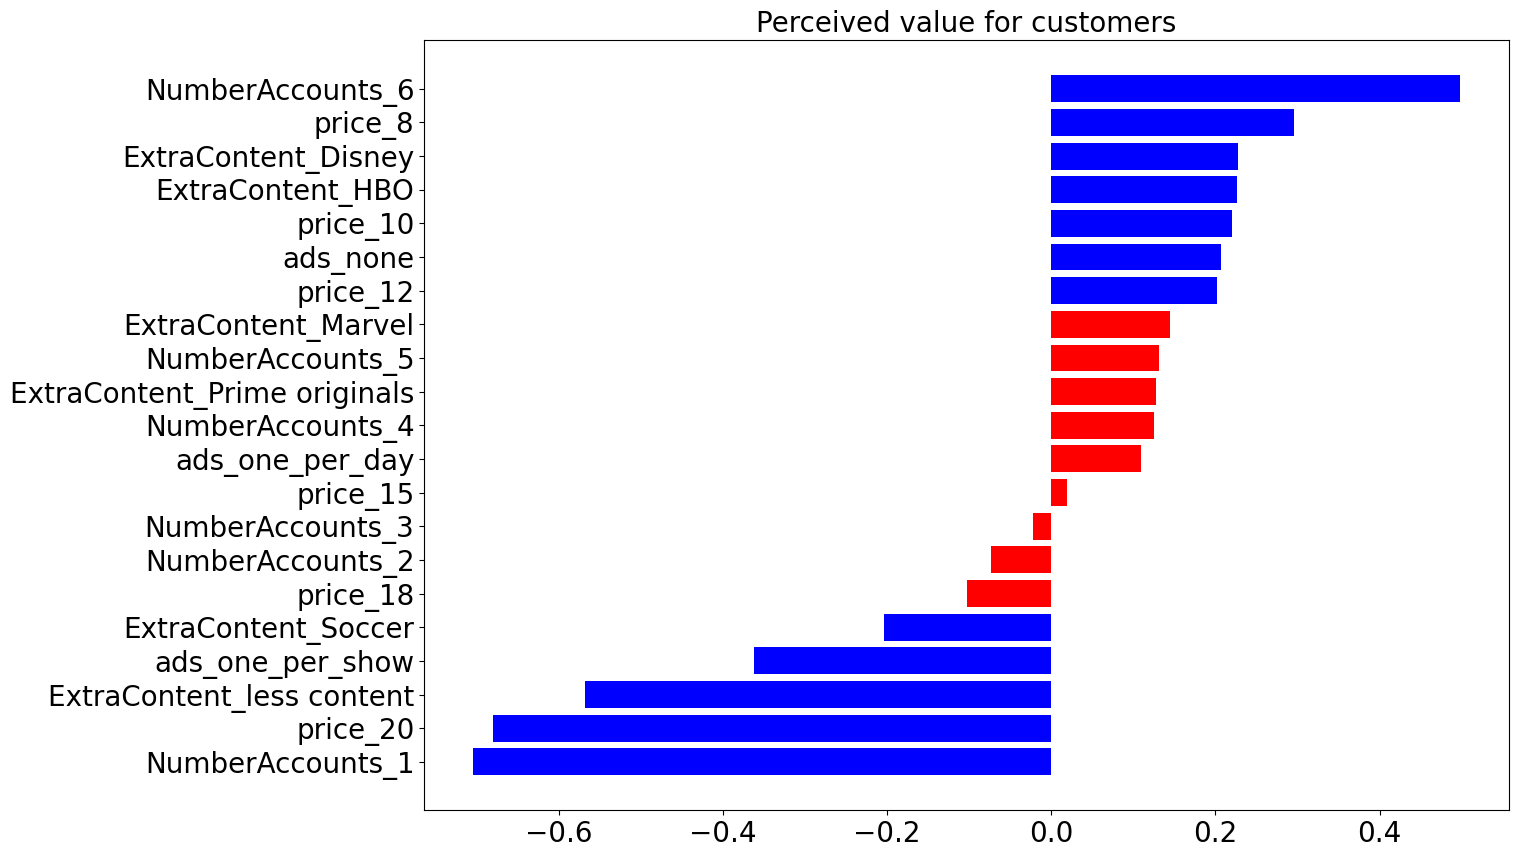

In [11]:
# plot the partworth
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (14,10))
values  = df_result['partworth']

xbar = np.arange(len(values))
plt.title('Perceived value for customers', fontsize=20)

plt.barh(xbar, values, color=df_result['color'])


plt.yticks(xbar, labels=df_result['param_name'], fontsize=20)
plt.xticks(fontsize=20)

plt.show

## Spesific Group of Features

In [12]:
# Isolate the feature group

feature = "price"
attributes = []
coefficients = []

for i in range(len(df_result)):
    if df_result.iloc[i,0].find(feature)==0:
        attributes.append(df_result.iloc[i,0])
        coefficients.append((df_result.iloc[i,1]))
        
print (attributes)
print (coefficients)

['price_20', 'price_18', 'price_15', 'price_12', 'price_10', 'price_8']
[-0.6806768141418711, -0.10279141526718238, 0.019611665840020134, 0.2016760685826342, 0.2201809938698594, 0.29612926303343784]


<function matplotlib.pyplot.show(close=None, block=None)>

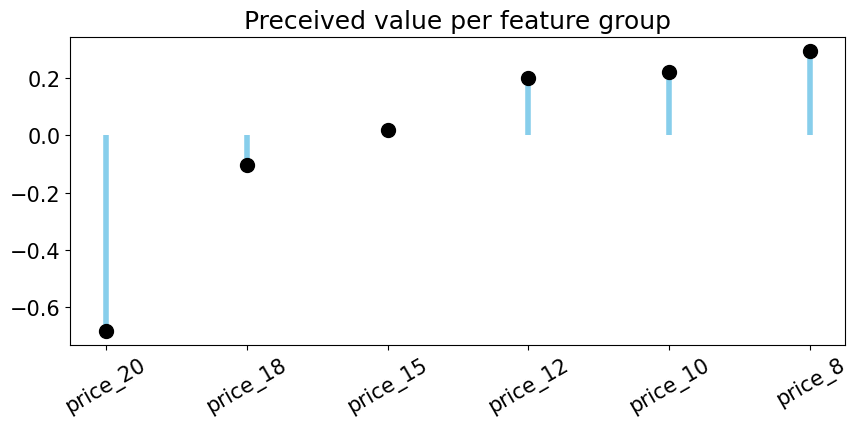

In [13]:
# Lollipop chart

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (10,4))
plt.title('Preceived value per feature group', fontsize=18)

(markers, stemlines, baseline) = plt.stem(attributes, coefficients, linefmt="-", markerfmt="o", basefmt=" ")


plt.setp(stemlines, color="skyblue", linewidth=4)
plt.setp(markers, color="black", markersize=10)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=30)


plt.show


## Feature Importance

In [14]:
# Coefficients

features_partworth = {}
for key, coeff in model.params.items():
    split_key = key.split('_')
    feature = split_key[0]
    if feature not in features_partworth:
        features_partworth[feature] = list()
    features_partworth[feature].append(coeff)
    
features_partworth

{'NumberAccounts': [-0.7039976987812511,
  -0.07334555440614629,
  -0.02255061087781367,
  0.12521709231123096,
  0.1311569725684633,
  0.49764956110241465],
 'price': [0.29612926303343784,
  0.2201809938698594,
  0.2016760685826342,
  0.019611665840020134,
  -0.10279141526718238,
  -0.6806768141418711],
 'ExtraContent': [0.22769057179501173,
  0.22640586340759833,
  0.14497387399797118,
  0.1273758626969825,
  -0.20439973961780672,
  -0.5679166703628588],
 'ads': [0.20730570917314045, 0.1090249307408499, -0.36220087799709266]}

In [15]:
# Calculation maximum of a feature(price_8) minus minimum of feature (price_20)

importance_per_feature = {k: max(v) - min(v) for k, v in features_partworth.items()}

importance_per_feature

{'NumberAccounts': 1.2016472598836656,
 'price': 0.9768060771753089,
 'ExtraContent': 0.7956072421578705,
 'ads': 0.5695065871702332}

In [16]:
# Computing the sum of importances
total_importances = sum(importance_per_feature.values())

total_importances

3.5435671663870787

In [17]:
# Relative importance (adds up to 100)
relative_importance_per_feature = {
    k:round(100* v/total_importances, 1) for k, v in importance_per_feature.items()
}

relative_importance_per_feature

{'NumberAccounts': 33.9, 'price': 27.6, 'ExtraContent': 22.5, 'ads': 16.1}

In [18]:
# Build DF
df_importances = pd.DataFrame(
    list(relative_importance_per_feature.items()),
    columns = ['feature', 'relative_importance']
)

In [19]:
df_importances

,feature,relative_importance
0,NumberAccounts,33.9
1,price,27.6
2,ExtraContent,22.5
3,ads,16.1


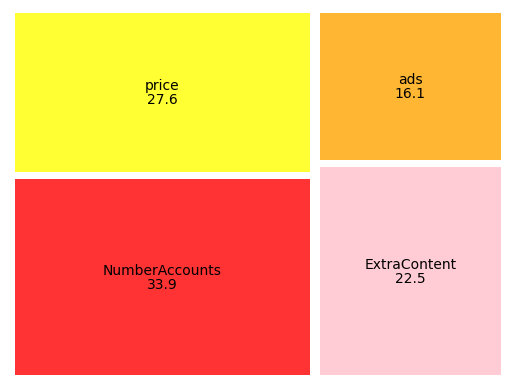

In [20]:
# Treemap
import squarify 
squarify.plot(sizes = df_importances.relative_importance,
              label = df_importances.feature,
              color = ['red', 'yellow', 'pink', 'orange'],
              value = df_importances.relative_importance,
              alpha = 0.8,
              pad = 1
             )

plt.axis("off")
plt.show()

## Interaction Term

In [21]:
df['content_ads'] = df.ExtraContent + "_" + df.ads
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_one_per_show


In [22]:
# remove the variable in the interaction term
df_interaction = df.drop(columns=['ExtraContent', 'ads'])

In [23]:
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [24]:
y = df_interaction['selected']
X = df_interaction.drop(columns=['selected', 'customerid'])

X.head()

,NumberAccounts,price,content_ads
0,2,10,HBO_one_per_day
1,6,8,Marvel_one_per_show
2,4,15,Disney_one_per_day
3,5,10,HBO_one_per_day
4,1,20,Soccer_one_per_show


In [25]:
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_one_per_show,content_ads_Prime originals_none,content_ads_Prime originals_one_per_day,content_ads_Prime originals_one_per_show,content_ads_Soccer_none,content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_show,content_ads_less content_none,content_ads_less content_one_per_day,content_ads_less content_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [26]:
model2 = sm.GLM(y, X_dummy, family = sm.families.Binomial()).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2972
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1941.8
Date:                Sat, 14 Sep 2024   Deviance:                       3883.6
Time:                        17:27:43   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08766
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
NumberAccounts_1                            -0.7143      0.094     -7.613      0.000      -0.898      -0.530
NumberAccounts_2                            -0.0701      0.090     -0.776      0.438      -0.247       0.107
NumberAccounts_3                            -0.0297      0.090     -0.329      0.742      -0.206       0.147
NumberAccounts_4                             0.1116      0.085      1.317      0.188      -0.054       0.278
NumberAccounts_5                             0.1236      0.086      1.435      0.151      -0.045       0.292
NumberAccounts_6                             0.4880      0.083      5.897      0.000       0.326       0.650
price_8                                      0.2880      0.086      3.359      0.001       0.120       0.456
price_10                                     0.2091      0.088      2.368      0.018       0.036       0.382
price_12                                     0.1984      0.083      2.382      0.017       0.035       0.362
price_15                                     0.0086      0.086      0.101      0.920      -0.159       0.176
price_18                                    -0.1119      0.089     -1.258      0.208      -0.286       0.062
price_20                                    -0.6832      0.096     -7.135      0.000      -0.871      -0.496
content_ads_Disney_none                      0.3314      0.152      2.177      0.029       0.033       0.630
content_ads_Disney_one_per_day               0.5433      0.171      3.169      0.002       0.207       0.879
content_ads_Disney_one_per_show             -0.1541      0.160     -0.965      0.335      -0.467       0.159
content_ads_HBO_none                         0.5222      0.156      3.344      0.001       0.216       0.828
content_ads_HBO_one_per_day                  0.5041      0.153      3.303      0.001       0.205       0.803
content_ads_HBO_one_per_show                -0.3502      0.159     -2.198      0.028      -0.662      -0.038
content_ads_Marvel_none                      0.2548      0.152      1.678      0.093      -0.043       0.552
content_ads_Marvel_one_per_day               0.2276      0.157      1.451      0.147      -0.080       0.535
content_ads_Marvel_one_per_show             -0.0539      0.151     -0.357      0.721      -0.350       0.242
content_ads_Prime originals_none             0.2541      0.157      1.617      0.106      -0.054       0.562
content_ads_Prime originals_one_per_day      0.1273      0.155      0.824      0.410      -0.175       0.430
content_ads_Prime originals_one_per_show     0.0190      0.162      0.117      0.907      -0.299       0.337
content_ads_Soccer_none                      0.1448      0.154      0.939      0.348      -0.158       0.447
content_ads_Soccer_one_per_day 

## Interaction Terms Result

In [27]:
df_result_interaction = pd.DataFrame({'param_name': model2.params.keys(), 'partworth': model2.params.values, 'pval': model2.pvalues}).sort_values(
by='partworth')

df_result_interaction

,param_name,partworth,pval
content_ads_less content_one_per_show,content_ads_less content_one_per_show,-1.079566,4.276202e-09
NumberAccounts_1,NumberAccounts_1,-0.714278,2.677503e-14
price_20,price_20,-0.683239,9.705069e-13
content_ads_Soccer_one_per_show,content_ads_Soccer_one_per_show,-0.498399,2.629327e-03
content_ads_less content_one_per_day,content_ads_less content_one_per_day,-0.417259,1.121126e-02
content_ads_HBO_one_per_show,content_ads_HBO_one_per_show,-0.350151,2.796648e-02
content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_day,-0.241936,1.233293e-01
content_ads_less content_none,content_ads_less content_none,-0.224281,1.422227e-01
content_ads_Disney_one_per_show,content_ads_Disney_one_per_show,-0.154089,3.347898e-01
price_18,price_18,-0.111873,2.083951e-01


In [28]:
# Isolate the feature group

feature = "content_ads"
attributes = []
coefficients = []

for i in range(len(df_result_interaction)):
    if df_result_interaction.iloc[i,0].find(feature)==0:
        if df_result_interaction.iloc[i,0].find('none') == -1:
            attributes.append(df_result_interaction.iloc[i,0])
            coefficients.append((df_result_interaction.iloc[i,1]))
        
print (attributes)
print (coefficients)

['content_ads_less content_one_per_show', 'content_ads_Soccer_one_per_show', 'content_ads_less content_one_per_day', 'content_ads_HBO_one_per_show', 'content_ads_Soccer_one_per_day', 'content_ads_Disney_one_per_show', 'content_ads_Marvel_one_per_show', 'content_ads_Prime originals_one_per_show', 'content_ads_Prime originals_one_per_day', 'content_ads_Marvel_one_per_day', 'content_ads_HBO_one_per_day', 'content_ads_Disney_one_per_day']
[-1.079566418853303, -0.498399210966048, -0.4172585467615459, -0.35015142947413247, -0.24193586962522223, -0.15408901620838467, -0.05392856668043858, 0.01896813105910991, 0.12733400903656655, 0.22761391853419705, 0.5041209110240112, 0.5433339421420436]


<function matplotlib.pyplot.show(close=None, block=None)>

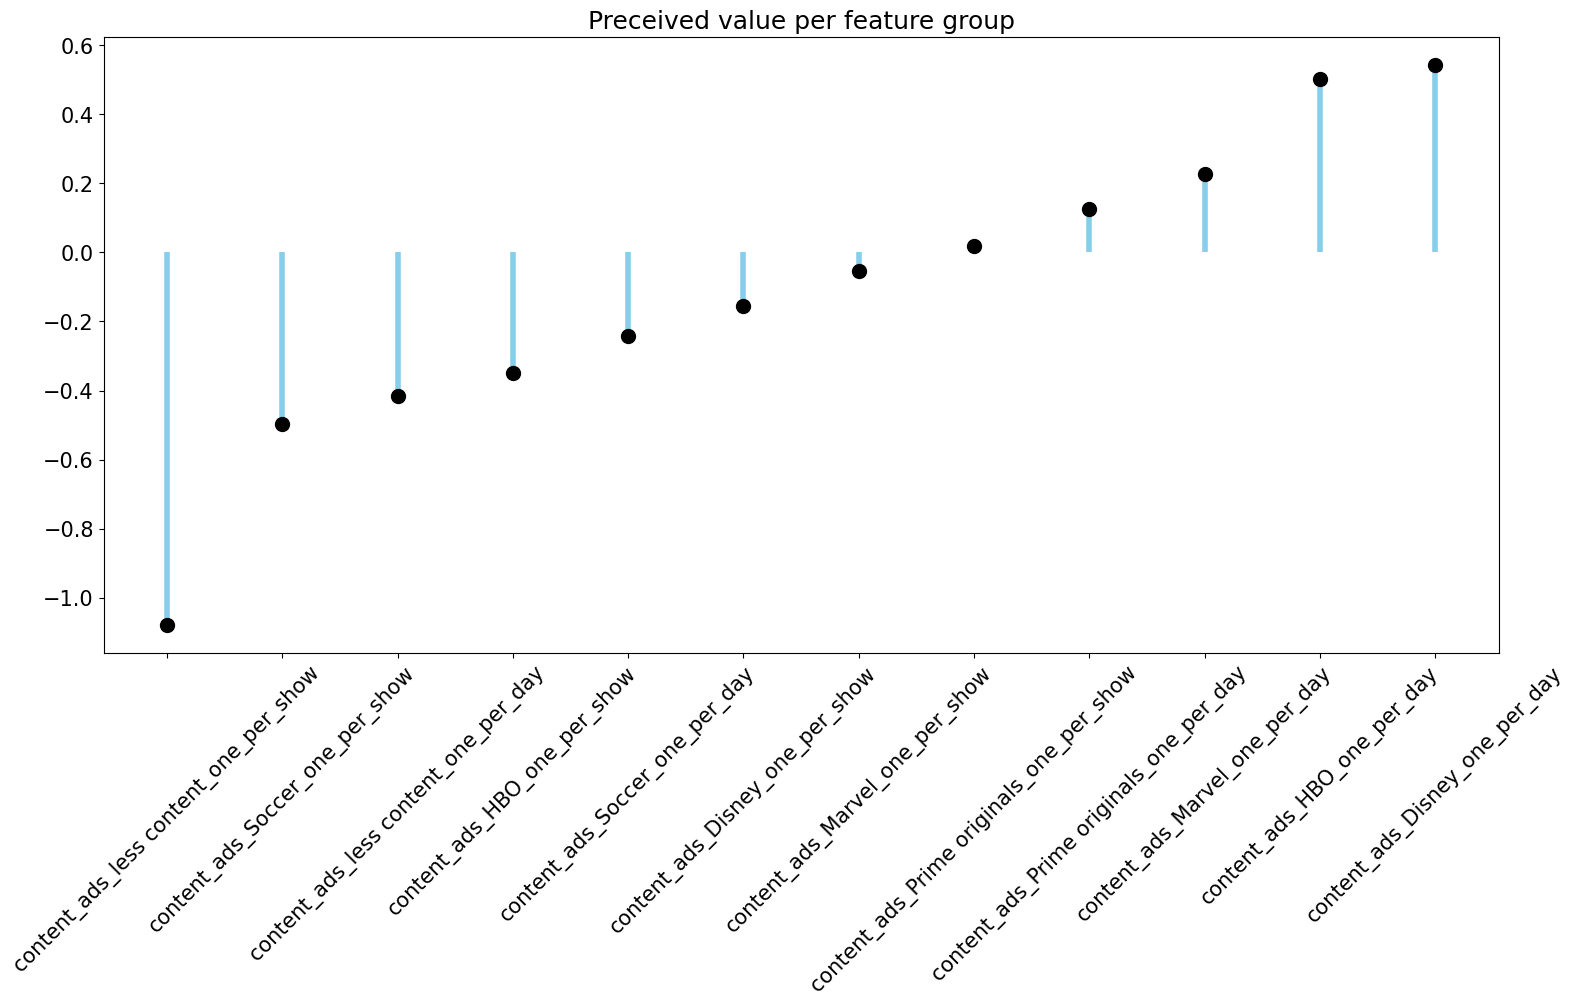

In [29]:
f, ax = plt.subplots(figsize = (18,8))
plt.title('Preceived value per feature group', fontsize=18)

(markers, stemlines, baseline) = plt.stem(attributes, coefficients, linefmt="-", markerfmt="o", basefmt=" ")


plt.setp(stemlines, color="skyblue", linewidth=4)
plt.setp(markers, color="black", markersize=10)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45)


plt.show